# HYPOTHESIS TESTING

#### OBJECTIVES:
To carry out testing on the hypotheses proposed using statistical analysis with visuals to analyse it. In order to derive suitable measures to help reduce malarria incidence in Nigeria

#### INPUT: 
The merged_dataset used for the analysis,python libraries for learning and plotting of the data

#### OUTPUT: 
Result of the hypothesis

In [1]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

# Load the merged dataset
df_merged = pd.read_csv('merged_dataset.csv')

# **Hypothesis 1**:  Using Chi-Square Test

To test if underreporting has a significant effect on the mortality in Nigeria

• NULL HYPOTHESIS(H<sub>0</sub>): Underreporting does not have a significant impact on malaria deaths in Nigeria

•  ALTERNATIVE HYPOTHESIS|(H<sub>1</sub>): Malaria deaths are significantly higher in areas of high underreporting of malaria cases.




In [4]:
import scipy.stats as stats

# Define underreporting as the difference between estimated and reported cases
df_merged['Underreporting'] = df_merged['No. of cases_median'] - df_merged['Reported Cases']
df_merged['Underreporting Level'] = df_merged['Underreporting'].apply(lambda x: 'High' if x > df_merged['Underreporting'].median() else 'Low')

# Define death levels (High/Low based on median)
df_merged['Death Level'] = df_merged['No. of deaths_median'].apply(lambda x: 'High' if x > df_merged['No. of deaths_median'].median() else 'Low')

# Create contingency table
contingency_table = pd.crosstab(df_merged['Underreporting Level'], df_merged['Death Level'])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject H₀: Underreporting significantly affects malaria deaths in Nigeria.")
else:
    print("Fail to reject H₀: No significant effect of underreporting on malaria deaths.")


Chi-Square Statistic: 562.6588785046729
P-value: 2.219350768431402e-124
Reject H₀: Underreporting significantly affects malaria deaths in Nigeria.


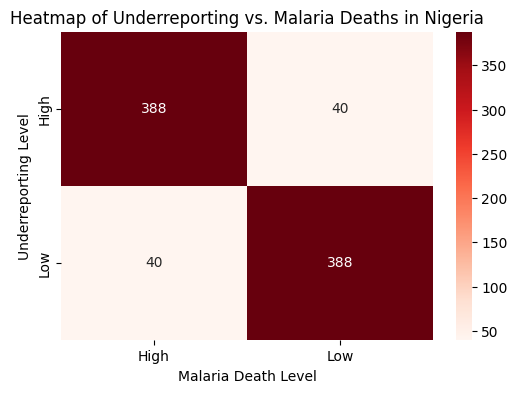

In [ ]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, cmap="Reds", fmt="d")
plt.xlabel("Malaria Death Level")
plt.ylabel("Underreporting Level")
plt.title("Heatmap of Underreporting vs. Malaria Deaths in Nigeria")
plt.show()
